In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('SoSampleTest.xlsx')

In [3]:
print(df)

    Week Start     Bookings
0   2021-08-01   129.808103
1   2021-08-08   122.962071
2   2021-08-15   153.664518
3   2021-08-22   234.772937
4   2021-08-29   214.594944
..         ...          ...
126 2023-12-31    86.172820
127 2024-01-07   191.243189
128 2024-01-14   228.979605
129 2024-01-21  1085.917765
130 2024-01-28   126.711120

[131 rows x 2 columns]


In [4]:
df.head()

,Week Start,Bookings
0,2021-08-01,129.808103
1,2021-08-08,122.962071
2,2021-08-15,153.664518
3,2021-08-22,234.772937
4,2021-08-29,214.594944


In [5]:
df.set_index('Week Start',inplace=True)

In [6]:
df.head()

,Bookings
Week Start,
2021-08-01,129.808103
2021-08-08,122.962071
2021-08-15,153.664518
2021-08-22,234.772937
2021-08-29,214.594944


In [7]:
df.describe()

,Bookings
count,131.000000
mean,288.372461
std,261.808817
min,72.686246
25%,160.023637
50%,209.594394
75%,289.028204
max,1782.905032


<Axes: xlabel='Week Start'>

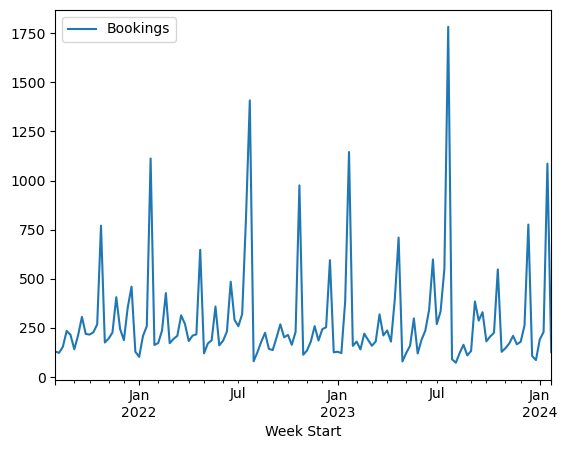

In [8]:
#Step 2. Visualize the Data
df.plot()

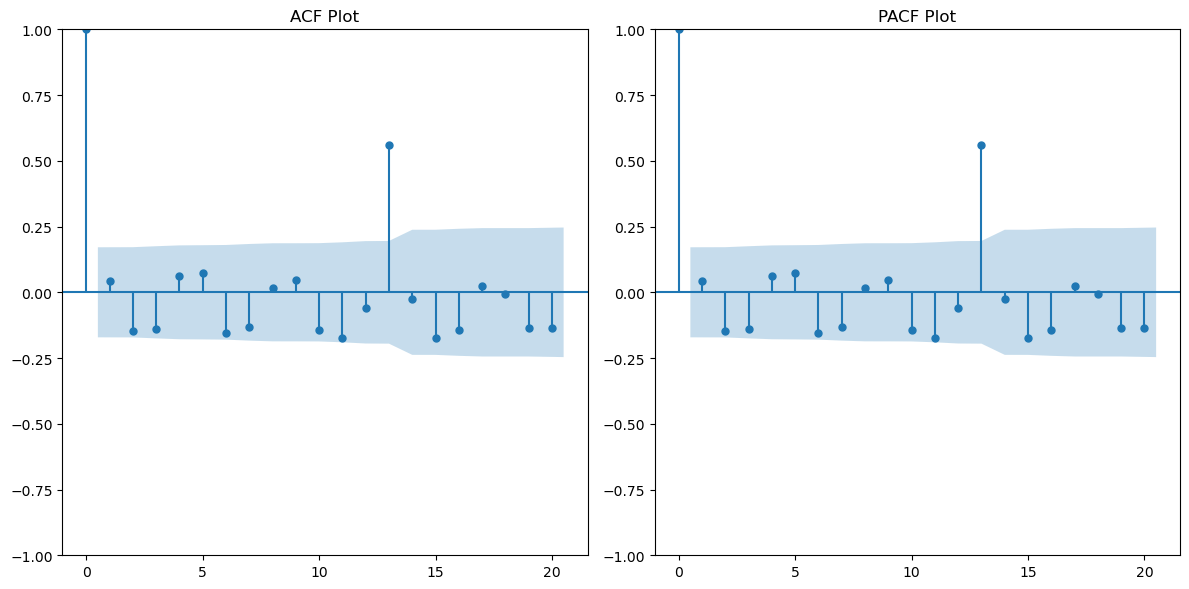

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ACF plot- Autocorrelation function to get the p value i.e. Max value after which it diminishes (has to be integer)
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)# grid size
plot_acf(df,lags=20, ax=plt.gca()) #display auto correlation values for the first 20 lags 
plt.title('ACF Plot')

#PACF plot-Partial Autocorrelation to get the p value i.e. Max value after which it diminishes (has to be integer)
plt.subplot(1,2,2)# grid size
plot_acf(df,lags=20, ax=plt.gca()) #display auto correlation values for the first 20 lags 
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

In [10]:
###Testing for Stationarity

from statsmodels.tsa.stattools import adfuller

In [11]:
#Null Hypo: It is non stationary
#Alternate Hypo: It is stationary
#95% CI considered

def adfuller_test(Bookings):
    result=adfuller(Bookings)
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result,labels):
        print(label+':'+str(value))
    if result[1] <=.05:
        print("Strong evidence against null hypo")
    else:
        print("Weak evidence against null hypo")

In [12]:
adfuller_test(df['Bookings'])

ADF Test Statistic:-3.1663425473241937
p-value:0.022017452406426583
#Lags Used:13
Number of Observations Used:117
Strong evidence against null hypo


In [16]:
### For non-seasonal data
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['Bookings'],order=(1,0,1))

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [17]:
results=model.fit()

<Axes: xlabel='Week Start'>

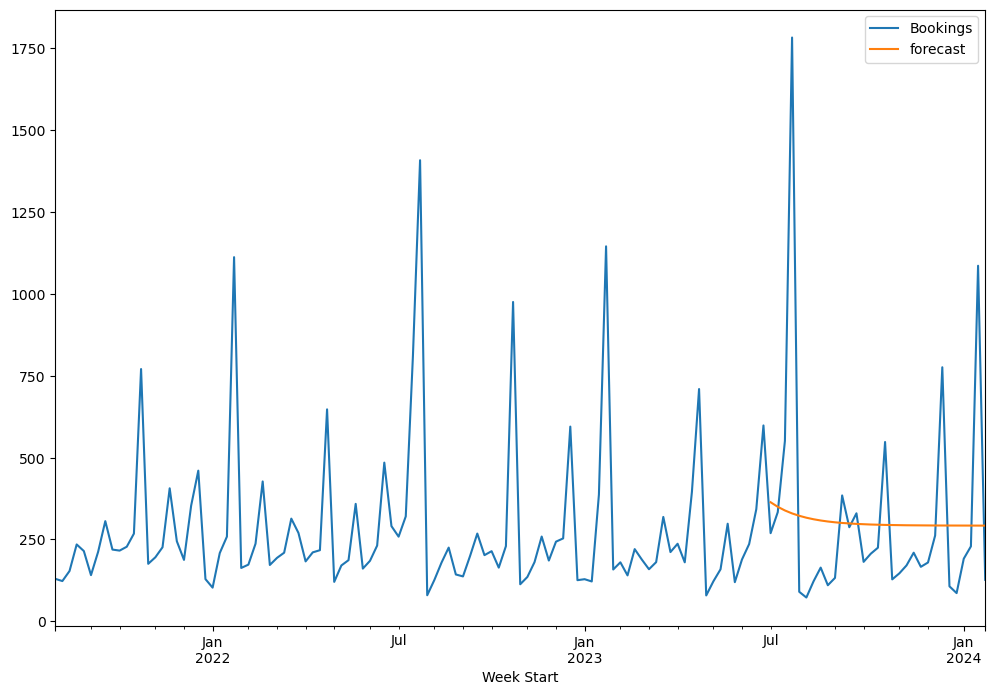

In [18]:
df['forecast']=results.predict(start=100, end = 130, dynamic=True) # testing the model performance with sample input
df[['Bookings','forecast']].plot(figsize=(12,8))

In [19]:
### Predicting future forecast
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+DateOffset(weeks=x)for x in range(0,26)] # Creating future weeks- 26 weeks placeholder

In [20]:
future_dataset_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_dataset_df.index.name = 'Week Start'

In [21]:
future_dataset_df.head()

,Bookings,forecast
Week Start,,
2024-02-04,NaN,NaN
2024-02-11,NaN,NaN
2024-02-18,NaN,NaN
2024-02-25,NaN,NaN
2024-03-03,NaN,NaN


In [22]:
future_df=pd.concat([df,future_dataset_df])

/var/folders/qg/9qnm2g51701gxcxzzwr1q97c0000gn/T/ipykernel_91318/674726799.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_dataset_df])


<Axes: xlabel='Week Start'>

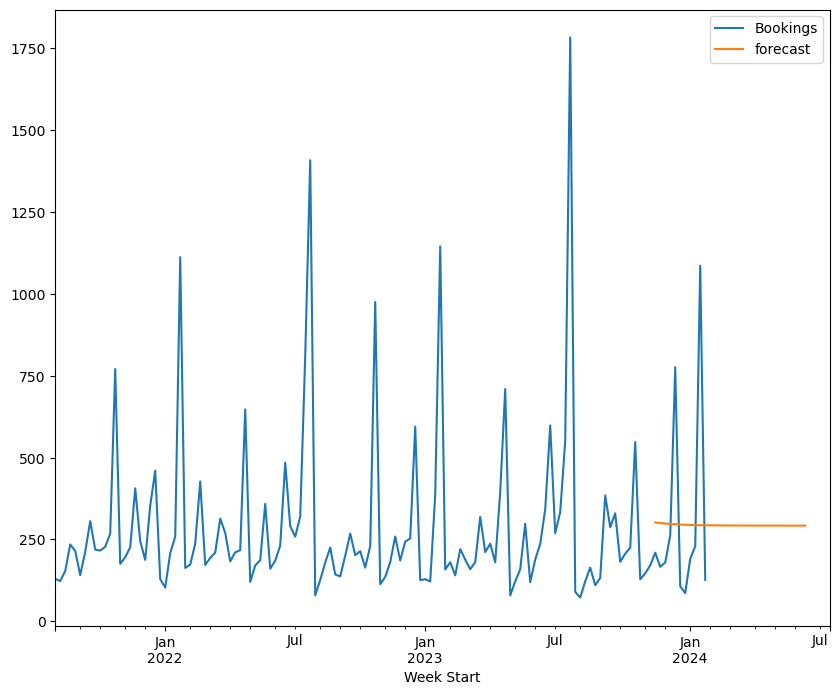

In [23]:
future_df['forecast']=results.predict(start=120, end=150, dynamic=True)
future_df[['Bookings','forecast']].plot(figsize=(10,8))

In [24]:
future_df1=future_df[future_df['forecast'].notna()]
# check the forecast values along with the bookings for the last weeks
print(future_df1)

               Bookings    forecast
Week Start                         
2023-11-19   209.594394  302.087411
2023-11-26   166.480645  300.160777
2023-12-03   179.642179  298.608379
2023-12-10   262.158393  297.357524
2023-12-17   775.903533  296.349640
2023-12-24   106.904772  295.537530
2023-12-31    86.172820  294.883168
2024-01-07   191.243189  294.355911
2024-01-14   228.979605  293.931070
2024-01-21  1085.917765  293.588752
2024-01-28   126.711120  293.312927
2024-02-04          NaN  293.090679
2024-02-11          NaN  292.911602
2024-02-18          NaN  292.767309
2024-02-25          NaN  292.651044
2024-03-03          NaN  292.557363
2024-03-10          NaN  292.481878
2024-03-17          NaN  292.421056
2024-03-24          NaN  292.372049
2024-03-31          NaN  292.332560
2024-04-07          NaN  292.300742
2024-04-14          NaN  292.275105
2024-04-21          NaN  292.254447
2024-04-28          NaN  292.237802
2024-05-05          NaN  292.224391
2024-05-12          NaN  292

In [25]:
# Save the new dataframe in the workbook
from openpyxl import Workbook  # openpyxl helps to read and write data in excel
future_df1.to_excel('output_up.xlsx', index=True, engine='openpyxl')
print('Yes the file is downloading...')

Yes the file is downloading...


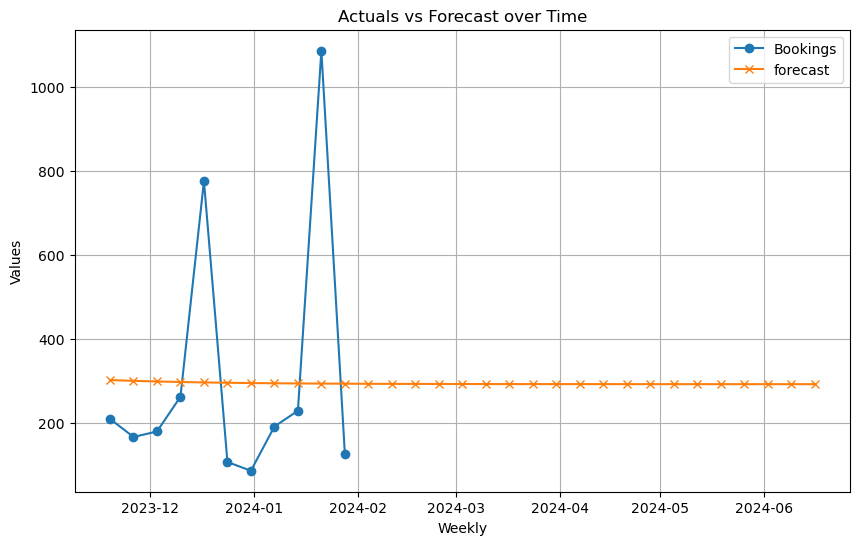

In [26]:
# Plot the Actuals vs Forecast

plt.figure(figsize=(10, 6))
plt.plot(future_df1.index, future_df1['Bookings'], label='Bookings', marker='o')
plt.plot(future_df1.index, future_df1['forecast'], label='forecast', marker='x')

# Customize the graph
plt.title('Actuals vs Forecast over Time')
plt.xlabel('Weekly')
plt.ylabel('Values')
plt.grid(True)
plt.legend(loc='upper right')

# Save the plot to a PNG file. Needs to save first before showing the plot
plt.savefig('actuals_forecast_2022_2024.png')

# Show the plot in Jupyter Notebook
plt.show()

In [27]:
import openpyxl
from openpyxl.drawing.image import Image

# Load the workbook and select the active worksheet
wb = openpyxl.load_workbook('output_up.xlsx')
ws = wb.active #worksheet activated 

# Add the saved image to the worksheet
img = Image('actuals_forecast_2022_2024.png')
ws.add_image(img, 'G5')  # Insert the image starting from cell G5

# Save the updated Excel file
wb.save('actuals_forecast_2022_2024.xlsx')